## Team members
1. Ujwal Kothapally
2. Indhiresh Reddy Linga Reddy
3. Venkata P

# Task 1: Importing packages

In [ ]:
import re
import random
import pandas as pd
import torch
import torch.nn as nn
from torch import optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from sklearn.model_selection import train_test_split

# Task 2: Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_frame = pd.read_excel('/content/drive/MyDrive/NLP_Final/dataset.xlsx')
data_frame.head(6)

,English,Hindi
0,Yale offers advanced degrees through its Gradu...,येल अपने ग्रेजुएट स्कूल ऑफ आर्ट्स एंड साइंसेज ...
1,Browse the organizations below for information...,"अध्ययन के कार्यक्रमों, शैक्षणिक आवश्यकताओं और ..."
2,Graduate School of Arts & Sciences.,ग्रेजुएट स्कूल ऑफ आर्ट्स एंड साइंसेज।
3,Yale’s Graduate School of Arts & Sciences offe...,येल के ग्रेजुएट स्कूल ऑफ आर्ट्स एंड साइंसेज एम...
4,School of Architecture.,स्कूल ऑफ आर्किटेक्चर।
5,The Yale School of Architecture’s mandate is f...,येल स्कूल ऑफ आर्किटेक्चर का जनादेश प्रत्येक छा...


In [ ]:

!pip install transformers

In [ ]:
!pip install sentencepiece

In [ ]:

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:
checkpoint = 'Helsinki-NLP/opus-mt-en-hi'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
training_data, testing_data = train_test_split(data_frame, test_size=0.2, random_state=42)

validation_data, testing_data = train_test_split(testing_data, test_size=0.5, random_state=42)

In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):

    def __init__(self, df):
        super().__init__()
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        english = self.df['English'].iloc[index]
        hindi = self.df['Hindi'].iloc[index]
        return {'English':english, 'Hindi': hindi}

In [ ]:
train_dataSet = CustomDataset(training_data)
valid_dataSet = CustomDataset(validation_data)
test_dataSet = CustomDataset(testing_data)

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataSet, batch_size=8, shuffle=True)

val_loader = DataLoader(valid_dataSet, batch_size=8, shuffle=True)

test_loader = DataLoader(test_dataSet, batch_size=8, shuffle=True)

In [ ]:
for i in train_loader:
  print(i)
  break

{'English': ['Yale’s Graduate School of Arts & Sciences offers programs leading to M.A., M.S., M.Phil., and Ph.D. degrees in 73 departments and programs.', 'Students can find assistance with matching international experiences to their programs of study.', 'Yale University is one of the oldest and most prestigious universities in the United States.', 'The Yale School of Engineering & Applied Science is at the cutting edge of research to develop technologies that address global societal problems.', 'Jackson School of Global Affairs.', 'The Yale School of Architecture’s mandate is for each student to understand architecture as a creative, productive, innovative, and responsible practice.', 'Students pursuing degrees in the fields of engineering.', 'those who have been visiting scholars.'], 'Hindi': ['येल के ग्रेजुएट स्कूल ऑफ आर्ट्स एंड साइंसेज एमए, एमएस, एम.फिल, और पीएचडी के लिए अग्रणी कार्यक्रम प्रदान करता है। 73 विभागों और कार्यक्रमों में डिग्री।', 'छात्र अपने अध्ययन के कार्यक्रमों के ल

In [ ]:
model.to(device)

MarianMTModel(
  (model): MarianModel(
    (shared): Embedding(61950, 512, padding_idx=61949)
    (encoder): MarianEncoder(
      (embed_tokens): Embedding(61950, 512, padding_idx=61949)
      (embed_positions): MarianSinusoidalPositionalEmbedding(512, 512)
      (layers): ModuleList(
        (0-5): 6 x MarianEncoderLayer(
          (self_attn): MarianAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation_fn): SiLUActivation()
          (fc1): Linear(in_features=512, out_features=2048, bias=True)
          (fc2): Linear(in_features=2048, out_features=512, bias=True)
          (final_layer_norm): LayerNorm((512,),

In [ ]:
def preprocess(batch, device='cuda'):
    # Tokenize the inputs and targets
    inputs = tokenizer(batch["English"], padding=True, truncation=True, return_tensors="pt")
    targets = tokenizer(batch["Hindi"], padding=True, truncation=True, return_tensors="pt")

    # Move inputs and targets to the desired device (CPU or CUDA)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    targets = {k: v.to(device) for k, v in targets.items()}

    return inputs, targets

Epoch 0: Loss = 5.516218258784368
Epoch 1: Loss = 3.3773002441112814
Epoch 2: Loss = 2.9960371347574086
Epoch 3: Loss = 2.772024393081665
Epoch 4: Loss = 2.6277818863208475
Epoch 5: Loss = 2.4508051505455604
Epoch 6: Loss = 2.4382738516880917
Epoch 7: Loss = 2.4462474309481106
Epoch 8: Loss = 2.3449645317517795
Epoch 9: Loss = 2.3347218861946692


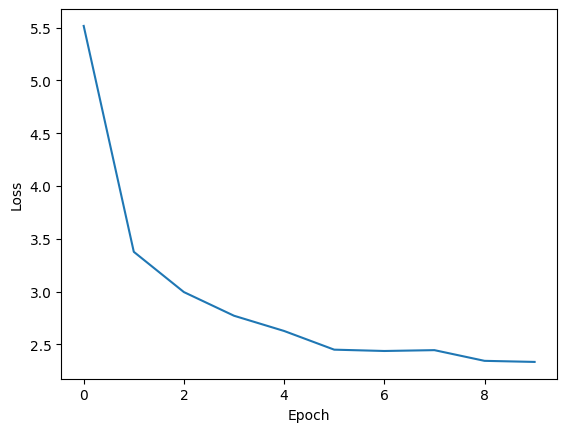

In [ ]:
import matplotlib.pyplot as plt
learning_rate = 0.001  # Adjust the learning rate based on your requirements

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Define the training loop with loss tracking
def train(epoch):
    model.train()
    total_loss = 0
    for batch in train_loader:
        inputs, targets = preprocess(batch)
        outputs = model(**inputs, labels=targets["input_ids"])
        loss_fn = nn.CrossEntropyLoss()
        loss = loss_fn(outputs.logits.view(-1, tokenizer.vocab_size), targets["input_ids"].view(-1))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch}: Loss = {avg_loss}")
    return avg_loss

# Train the model and track the loss over epochs
losses = []
for epoch in range(10):
    avg_loss = train(epoch)
    losses.append(avg_loss)

# Plot the loss over epochs
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
def generate_translation(model, tokenizer, input_text):
    # Tokenize the input text
    inputs = tokenizer(input_text, padding=True, truncation=True, return_tensors="pt")
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    # Generate the translations
    outputs = model.generate(inputs["input_ids"])
    # Decode the token IDs to text
    translations = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    return translations


# Generate translations for some input sentences
# training only on 2 samples!
batch= next(iter(train_loader))
predicted_text = list()
for input_text in batch['English']:
    translation = generate_translation(model, tokenizer, input_text)
    print(f"Input: {input_text}")
    print(f"Translation: {translation}\n")
    predicted_text.extend(translation)


Input: The university is home to the Yale University Art Gallery, one of the oldest and most respected art museums in the country.
Translation: ['विश्\u200dव - स्वास्थ्य संगठन के हिसाब से, इस देश के सबसे पुराने और सबसे जाने - माने संग्रहालयों में से एक है ।']

Input: Yale’s international research, teaching, and learning activities are undertaken in a wide variety of centers and programs across all academic fields.
Translation: ['येल की अंतर्राष्ट्रीय खोज, शिक्षा, और सीखने के काम सभी स्कूली क्षेत्रों में विभिन्\u200dन प्रकार के केंद्रों और कार्यक्रमों में काम कर रहे हैं ।']

Input: interested applicants must apply directly to the school, college, or program where the degree will be awarded.
Translation: ['दिलचस्पी रखनेवालों को सीधे स्कूल, कॉलेज, या कार्यक्रम पर अमल करना चाहिए, जहाँ डिग्री को पुरस्कार दिया जाएगा ।']

Input: Yale's world-class faculty includes many Nobel laureates.
Translation: ['येल व्काक प र्क कंर रा केल क क रार्र क रा र्र्रं र्रा क र ल्रं ल  र्रा र्रा ल र्र्र्र्रा ल र 

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

score = list()
for index in range(len(predicted_text)):
# Tokenize the texts into lists of words
  pred_tokens = predicted_text[index].split()
  orig_tokens = batch['Hindi'][index].split()

# Calculate the BLEU score
  bleu_score = sentence_bleu([orig_tokens], pred_tokens, weights=(1,0,0,0))
  score.append(bleu_score)
print(f"BLEU score: {sum(score)/len(score)}")

BLEU score: 0.32952075460265634


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:

# Define the training loop
def train(optimizer):
    model.train()
    total_loss = 0
    for batch in train_loader:
        inputs, targets = preprocess(batch)
        outputs = model(**inputs, labels=targets["input_ids"])
        loss_fn = nn.CrossEntropyLoss()
        loss = loss_fn(outputs.logits.view(-1, tokenizer.vocab_size), targets["input_ids"].view(-1))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()
    print(f"Epoch {epoch}: Train Loss = {total_loss / len(train_loader)}")
    return total_loss / len(train_loader)

def eval_fn():
    model.eval()
    total_loss = 0
    for batch in val_loader:
      inputs, targets = preprocess(batch)
      outputs = model(**inputs, labels=targets["input_ids"])
      loss_fn = nn.CrossEntropyLoss()
      loss = loss_fn(outputs.logits.view(-1, tokenizer.vocab_size), targets["input_ids"].view(-1))
      total_loss += loss.item()
    print(f"Epoch {epoch}: valid Loss = {total_loss / len(val_loader)}")
    return total_loss / len(val_loader)



In [ ]:
learning_rates = [0.001, 0.01, 0.1]
training_loss = dict()
validation_loss = dict()
best_valid_losses = dict()
for lr in learning_rates:
  optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
  best_valid_loss = 1000
  train_losses = list()
  valid_losses = list()
  for i in range(30):
    train_loss = train(optimizer)
    valid_loss = eval_fn()
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    if valid_loss < best_valid_loss :
        torch.save(model.state_dict(), '/content/drive/MyDrive/NLP_Final/Learning-rate{}.pt'.format(lr))
        print ("SAVED")
        best_valid_loss = valid_loss
    print(f"Epoch : {i+1} train_loss :{train_loss} valid_loss :{valid_loss}")
  training_loss.update({lr:train_losses})
  validation_loss.update({lr:valid_losses})
  best_valid_losses.update({lr:best_valid_loss})

Epoch 9: Train Loss = 2.2660332367970395
Epoch 9: valid Loss = 1.8404567241668701
SAVED
Epoch : 1 train_loss :2.2660332367970395 valid_loss :1.8404567241668701
Epoch 9: Train Loss = 2.0622104681455173
Epoch 9: valid Loss = 1.6292582154273987
SAVED
Epoch : 2 train_loss :2.0622104681455173 valid_loss :1.6292582154273987
Epoch 9: Train Loss = 2.0007235270280104
Epoch 9: valid Loss = 1.7256344556808472
Epoch : 3 train_loss :2.0007235270280104 valid_loss :1.7256344556808472
Epoch 9: Train Loss = 1.8576507751758282
Epoch 9: valid Loss = 1.4452030062675476
SAVED
Epoch : 4 train_loss :1.8576507751758282 valid_loss :1.4452030062675476
Epoch 9: Train Loss = 1.790758884870089
Epoch 9: valid Loss = 1.6515483856201172
Epoch : 5 train_loss :1.790758884870089 valid_loss :1.6515483856201172
Epoch 9: Train Loss = 1.7550537219414344
Epoch 9: valid Loss = 1.770862102508545
Epoch : 6 train_loss :1.7550537219414344 valid_loss :1.770862102508545
Epoch 9: Train Loss = 1.6314086180466871
Epoch 9: valid Loss =

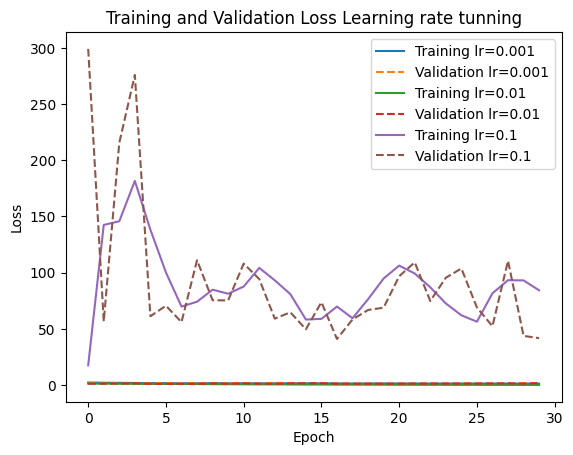

In [ ]:
import matplotlib.pyplot as plt


# Plot both training and validation loss on same graph
plt.figure()
for lr in learning_rates:
    plt.plot(training_loss[lr], label=f"Training lr={lr}")
    plt.plot(validation_loss[lr], label=f"Validation lr={lr}", linestyle='--')
plt.title("Training and Validation Loss Learning rate tunning")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
momentum_rates = [0.1, 0.5, 0.9]
training_loss = dict()
validation_loss = dict()
best_valid_losses = dict()
for p in momentum_rates:
  optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=p)
  best_valid_loss = 1000
  train_losses = list()
  valid_losses = list()
  for i in range(30):
    train_loss = train(optimizer)
    valid_loss = eval_fn()
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    if valid_loss < best_valid_loss :
        torch.save(model.state_dict(), '/content/drive/MyDrive/NLP_Final/Momentum-rate{}.pt'.format(p))
        print ("SAVED")
        best_valid_loss = valid_loss
    print(f"Epoch : {i+1} train_loss :{train_loss} valid_loss :{valid_loss}")
  training_loss.update({p:train_losses})
  validation_loss.update({p:valid_losses})
  best_valid_losses.update({p:best_valid_loss})

Epoch 9: Train Loss = 38.177663803100586
Epoch 9: valid Loss = 30.066279411315918
SAVED
Epoch : 1 train_loss :38.177663803100586 valid_loss :30.066279411315918
Epoch 9: Train Loss = 30.04922573383038
Epoch 9: valid Loss = 22.917771339416504
SAVED
Epoch : 2 train_loss :30.04922573383038 valid_loss :22.917771339416504
Epoch 9: Train Loss = 27.56616313640888
Epoch 9: valid Loss = 23.948880195617676
Epoch : 3 train_loss :27.56616313640888 valid_loss :23.948880195617676
Epoch 9: Train Loss = 23.976092632000263
Epoch 9: valid Loss = 18.145724296569824
SAVED
Epoch : 4 train_loss :23.976092632000263 valid_loss :18.145724296569824
Epoch 9: Train Loss = 21.657078082744892
Epoch 9: valid Loss = 17.034565925598145
SAVED
Epoch : 5 train_loss :21.657078082744892 valid_loss :17.034565925598145
Epoch 9: Train Loss = 19.63944889948918
Epoch 9: valid Loss = 16.31744384765625
SAVED
Epoch : 6 train_loss :19.63944889948918 valid_loss :16.31744384765625
Epoch 9: Train Loss = 17.866147408118614
Epoch 9: vali

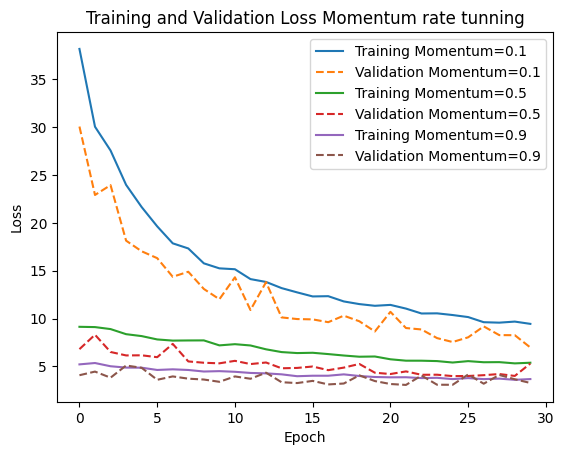

In [ ]:
import matplotlib.pyplot as plt


# Plot both training and validation loss on same graph
plt.figure()
for lr in momentum_rates:
    plt.plot(training_loss[lr], label=f"Training Momentum={lr}")
    plt.plot(validation_loss[lr], label=f"Validation Momentum={lr}", linestyle='--')
plt.title("Training and Validation Loss Momentum rate tunning")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
from nltk.translate.bleu_score import sentence_bleu


model.load_state_dict(torch.load('/content/drive/MyDrive/NLP_Final/Momentum-rate0.9.pt'))
model.eval()
score = []

for batch in test_loader:
    predicted_text = []

    with torch.no_grad():
        for input_text in batch['English']:
            translation = generate_translation(model, tokenizer, input_text)
            predicted_text.extend(translation)

    for index in range(len(predicted_text)):
        # Tokenize the texts into lists of words
        pred_tokens = predicted_text[index].split()
        orig_tokens = batch['Hindi'][index].split()

        # Calculate the BLEU score
        bleu_score = sentence_bleu([orig_tokens], pred_tokens, weights=(1, 0, 0, 0))
        score.append(bleu_score)
print(f"BLEU score: {bleu_score}")

BLEU score: 0


In [ ]:
def generate_predictions(model, tokenizer, data_loader):
    model.eval()
    predicted_text = []

    with torch.no_grad():
        for batch in data_loader:
            inputs, targets = preprocess(batch)
            outputs = model.generate(**inputs)
            translations = tokenizer.batch_decode(outputs, skip_special_tokens=True)
            predicted_text.extend(translations)

    return predicted_text

# Use the function to generate predictions on the test set
test_predictions = generate_predictions(model, tokenizer, test_loader)

# Print some examples
for i in range(min(5, len(test_predictions))):
    print(f"Input: {test_dataSet[i]['English']}")
    print(f"Expected Output: {test_dataSet[i]['Hindi']}")
    print(f"Predicted Output: {test_predictions[i]}\n")


Input: The last few years have highlighted how intrinsically linked our work at Yale.
Expected Output: पिछले कुछ वर्षों ने इस बात पर प्रकाश डाला है कि कैसे येल में हमारे काम को आंतरिक रूप से जोड़ा गया है।
Predicted Output: रररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररररर

Input: Opportunities for study or research abroad as well as exchange programs are managed by the individual schools and programs.
Expected Output: विदेशों में अध्ययन या अनुसंधान के अवसरों के साथ-साथ विनिमय कार्यक्रमों का प्रबंधन व्यक्तिगत स्कूलों और कार्यक्रमों द्

In [ ]:
def translate_input(model, tokenizer):
    user_input = input("Enter an English sentence to translate into Hindi: ")
    inputs = tokenizer(user_input, return_tensors='pt')
    print("Tokenized Input:", inputs)
    input_data = {'English': user_input, 'Hindi': ''}  # Placeholder for Hindi translation

    # Create a DataLoader for the single input
    input_data_set = CustomDataset(pd.DataFrame([input_data]))
    input_loader = DataLoader(input_data_set, batch_size=1, shuffle=False)

    # Use the prediction function to generate translation
    predictions = generate_predictions(model, tokenizer, input_loader)

    # Display the translated text
    print(f"\nInput: {user_input}")
    print(f"Translation: {predictions[0]}\n")

# Use the function to translate user input
translate_input(model, tokenizer)

